## The Best neighborhood in Pittsburgh (Based on Fire Incidents)
#### Joe Wang

When choosing a neighborhood, considering fire incidents is essential as they reflect the area's safety and quality of life.
    
High fire frequencies may suggest safety risks, including outdated infrastructure or insufficient fire prevention measures. The presence of an efficient and responsive fire department is crucial for ensuring safety and protecting property. Additionally, fire incidents can influence insurance premiums, with higher rates in areas with more frequent fires.


In [39]:
import pandas as pd

file_path_fire_incidents = '/home/jupyter-jow188/Big-Ideas-Final-Project/FireIncidents.csv'
file_path_population = '/home/jupyter-jow188/Big-Ideas-Final-Project/Population.csv'

fire_incidents_data = pd.read_csv(file_path_fire_incidents)
population_data = pd.read_csv(file_path_population)


### Introduction
The metric we used was the ratio of the number of people in each neighborhood to the number of fire incidents. We used a dataset containing all fire incidents in Pittsburgh and a dataset containing the number of residents in all Pittsburgh neighborhoods.

Display the first few rows of each dataset.

In [40]:
fire_incidents_data.head(5), population_data.head(5)

(   _id     call_no  incident_type        type_description  \
 0    1  F160029985          111.0           Building fire   
 1    2  F180022058          111.0           Building fire   
 2    3  F180022102          131.0  Passenger vehicle fire   
 3    4  F170043431          131.0  Passenger vehicle fire   
 4    5  F180021111          111.0           Building fire   
 
                                           address  alarms  \
 0       800 BLOCK CENTER ST, WILKINSBURG PA 15221       1   
 1        1100 BLOCK JANE ST, WILKINSBURG PA 15221       1   
 2  SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212       0   
 3      1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212       0   
 4      2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205       1   
 
             alarm_time primary_unit  census_tract neighborhood  \
 0  2016-04-21T05:01:04      231EN16           NaN          NaN   
 1  2018-03-13T08:34:43      231EN16           NaN          NaN   
 2  2018-03-13T11:54:23      231EN32        2406.0 

Data Cleaning and Preparation. Check for missing values in both datasets and overview of missing data.

In [41]:
missing_values_fire = fire_incidents_data.isnull().sum()
missing_values_population = population_data.isnull().sum()

missing_values_fire, missing_values_population

(_id                         0
 call_no                     0
 incident_type              18
 type_description            0
 address                     0
 alarms                      0
 alarm_time                 18
 primary_unit                5
 census_tract              592
 neighborhood             1398
 council_district         1364
 ward                     1399
 tract                     851
 public_works_division    1398
 pli_division             1399
 police_zone              1400
 fire_zone                  10
 latitude                  925
 longitude                 925
 dtype: int64,
 Neighborhood                                                                       0
 2010_Total_Population                                                              0
 2010_OneRace_Population                                                            0
 2010_White_Alone_Population                                                        0
 2010_Black_Alone_Population                        

Clean the Fire Incidents Data. Keep only rows where both latitude and longitude are not missing and overview of the cleaned data again.

In [42]:
cleaned_fire_data = fire_incidents_data.dropna(subset=['latitude', 'longitude'])

cleaned_fire_data.head(), cleaned_fire_data.isnull().sum()

(   _id     call_no  incident_type             type_description  \
 0    1  F160029985          111.0                Building fire   
 1    2  F180022058          111.0                Building fire   
 3    4  F170043431          131.0       Passenger vehicle fire   
 4    5  F180021111          111.0                Building fire   
 5    6  F180021782          150.0  Outside rubbish fire, Other   
 
                                        address  alarms           alarm_time  \
 0    800 BLOCK CENTER ST, WILKINSBURG PA 15221       1  2016-04-21T05:01:04   
 1     1100 BLOCK JANE ST, WILKINSBURG PA 15221       1  2018-03-13T08:34:43   
 3   1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212       0  2017-05-31T08:39:47   
 4   2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205       1  2018-03-09T10:26:42   
 5  S 7TH ST & E CARSON ST, PITTSBURGH PA 15203       0  2018-03-12T09:13:28   
 
   primary_unit  census_tract      neighborhood  council_district  ward  \
 0      231EN16           NaN          

Now we insert a map for better visualization. 

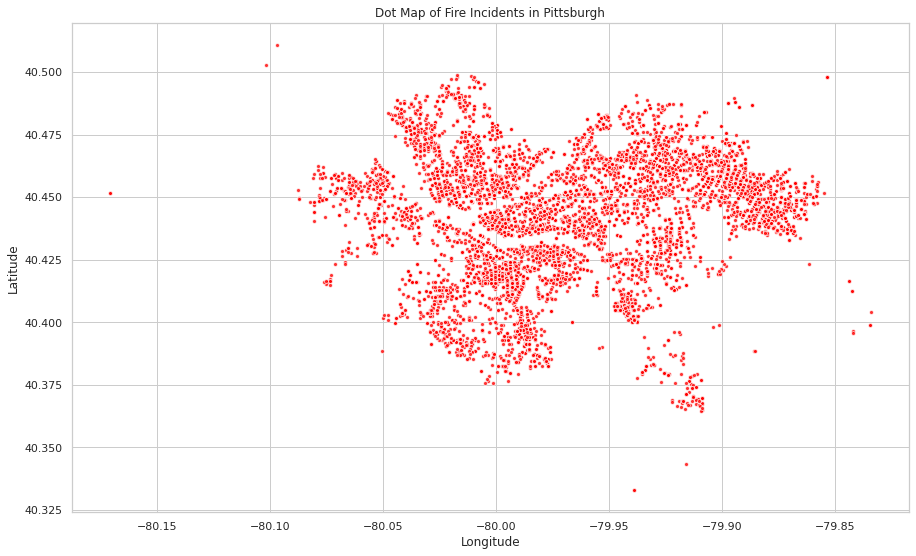

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(15, 9))
sns.scatterplot(x='longitude', y='latitude', data=cleaned_fire_data, s=15, color='red', alpha=0.8)
plt.title('Dot Map of Fire Incidents in Pittsburgh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The dot map above visualizes the fire incidents in Pittsburgh, with each dot representing an incident. This map provides a spatial distribution of fire incidents across the city.

After that, count the number of fire incidents in each neighborhood and merging this data with the population data.

In [44]:
# Counting the number of fire incidents in each neighborhood
fire_incidents_per_neighborhood = cleaned_fire_data['neighborhood'].value_counts().reset_index()
fire_incidents_per_neighborhood.columns = ['Neighborhood', 'Fire_Incidents']

# Merging this data with the population data
merged_data = pd.merge(fire_incidents_per_neighborhood, population_data, on='Neighborhood', how='left')



We use the rate of fire incidents per 1000 people in 2020 to determine which neighborhood has the lowest fire rate.

In [45]:
merged_data['Incidents_per_1000'] = (merged_data['Fire_Incidents'] / merged_data['2020_Total_Population']) * 1000

sorted_data = merged_data.sort_values(by='Incidents_per_1000', ascending=False)

final_data = sorted_data[['Neighborhood', 'Fire_Incidents', '2020_Total_Population', 'Incidents_per_1000']]

final_data

,Neighborhood,Fire_Incidents,2020_Total_Population,Incidents_per_1000
63,Chateau,41,19.0,2157.894737
73,South Shore,23,29.0,793.103448
46,North Shore,63,301.0,209.302326
76,West End,22,205.0,107.317073
50,Homewood West,59,642.0,91.900312
...,...,...,...,...
1,Central Business District,263,NaN,NaN
34,Spring Hill-City View,101,NaN,NaN
57,Arlington,51,NaN,NaN
84,Arlington Heights,13,NaN,NaN


Sort the data by the rate of incidents per 1000, from lowest to highest, only display top 10.

In [46]:
sorted_data_ascending = final_data.sort_values(by='Incidents_per_1000', ascending=True)

sorted_data_ascending.head(10)

,Neighborhood,Fire_Incidents,2020_Total_Population,Incidents_per_1000
69,Westwood,27,3332.0,8.103241
89,Regent Square,9,971.0,9.268795
67,Morningside,32,3252.0,9.840098
21,Squirrel Hill North,130,11879.0,10.943682
82,Swisshelm Park,15,1339.0,11.202390
25,North Oakland,124,10691.0,11.598541
10,Shadyside,181,15317.0,11.816935
41,Highland Park,76,6235.0,12.189254
85,Oakwood,13,1025.0,12.682927
53,Stanton Heights,57,4427.0,12.875536


### Conclusion

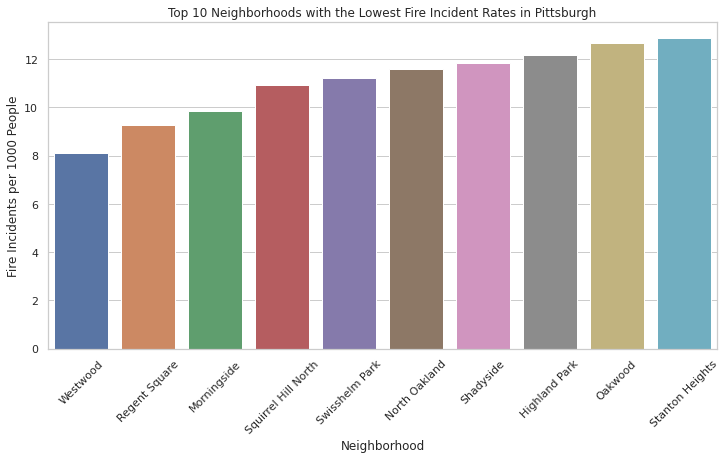

In [47]:
# Selecting the last 10 results (lowest fire rate neighborhoods) for the histogram
lowest_fire_rate_neighborhoods = sorted_data_ascending.head(10)

# Creating a histogram
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighborhood', y='Incidents_per_1000', data=lowest_fire_rate_neighborhoods)
plt.title('Top 10 Neighborhoods with the Lowest Fire Incident Rates in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Fire Incidents per 1000 People')
plt.xticks(rotation=45)
plt.show()